### Open and close `RG2` gripper

In [1]:
import mujoco
import numpy as np
import matplotlib.pyplot as plt
from mujoco_parser import MuJoCoParserClass
np.set_printoptions(precision=2,suppress=True,linewidth=100)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("MuJoCo version:[%s]"%(mujoco.__version__))

MuJoCo version:[2.3.6]


### Parse `scene_ur5e_rg2.xml`

In [2]:
xml_path = '../asset/ur5e/scene_ur5e_rg2.xml'
env = MuJoCoParserClass(name='UR5e',rel_xml_path=xml_path,VERBOSE=True)

dt:[0.0020] HZ:[500]
n_dof (=nv):[12]
n_geom:[41]
geom_names:['floor', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
n_body:[18]
body_names:['world', 'base', 'shoulder_link', 'upper_arm_link', 'forearm_link', 'wrist_1_link', 'wrist_2_link', 'wrist_3_link', 'tcp_link', 'camera_mount', 'rg2_gripper_base_link', 'camera_center', 'rg2_gripper_finger1_finger_link', 'rg2_gripper_finger1_inner_knuckle_link', 'rg2_gripper_finger1_finger_tip_link', 'rg2_gripper_finger2_finger_link', 'rg2_gripper_finger2_inner_knuckle_link', 'rg2_gripper_finger2_finger_tip_link']
n_joint:[12]
joint_names:['shoulder_pan_joint', 'shoulder_lift_joint', 'elbow_joint', 'wrist_1_joint', 'wrist_2_joint', 'wrist_3_joint', 'gripper_finger1_joint', 'gripper_finger1_inner_knuckle_joint', 'gripper_finger1_finger_tip_joint', 'gripper_f

### Render

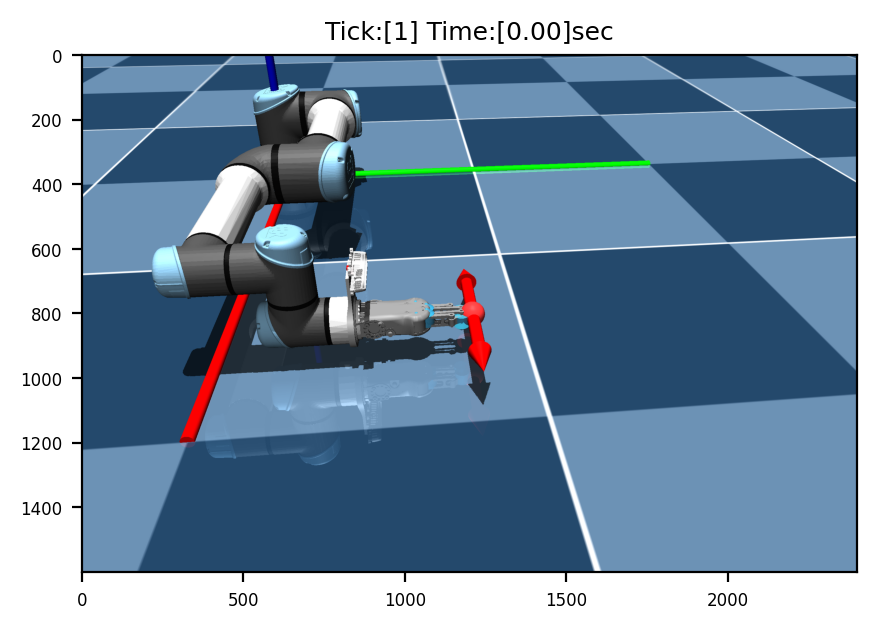

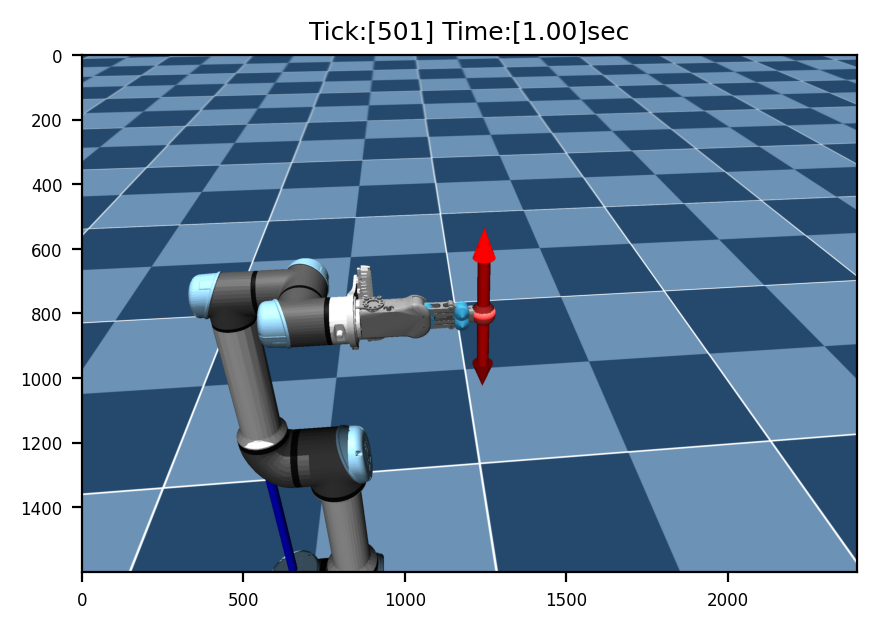

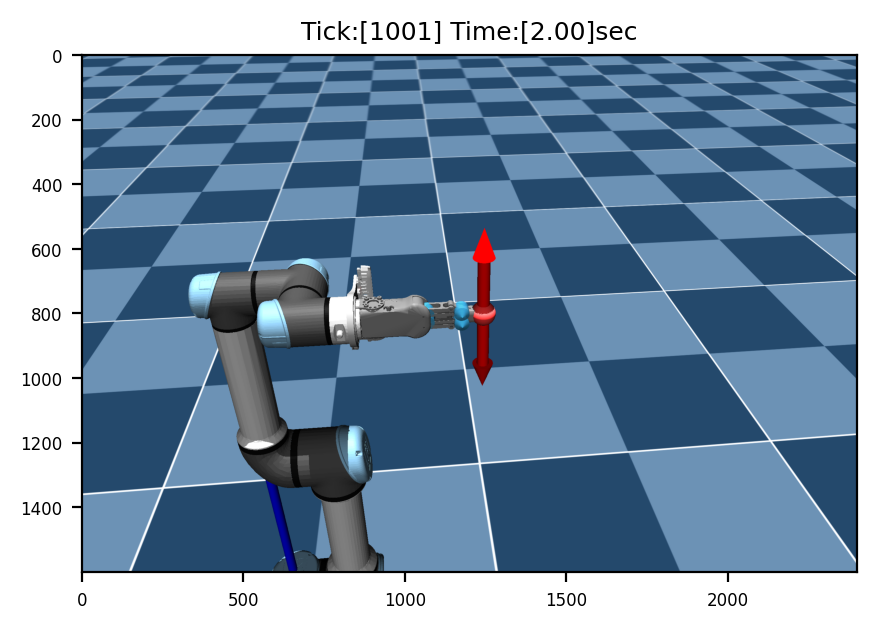

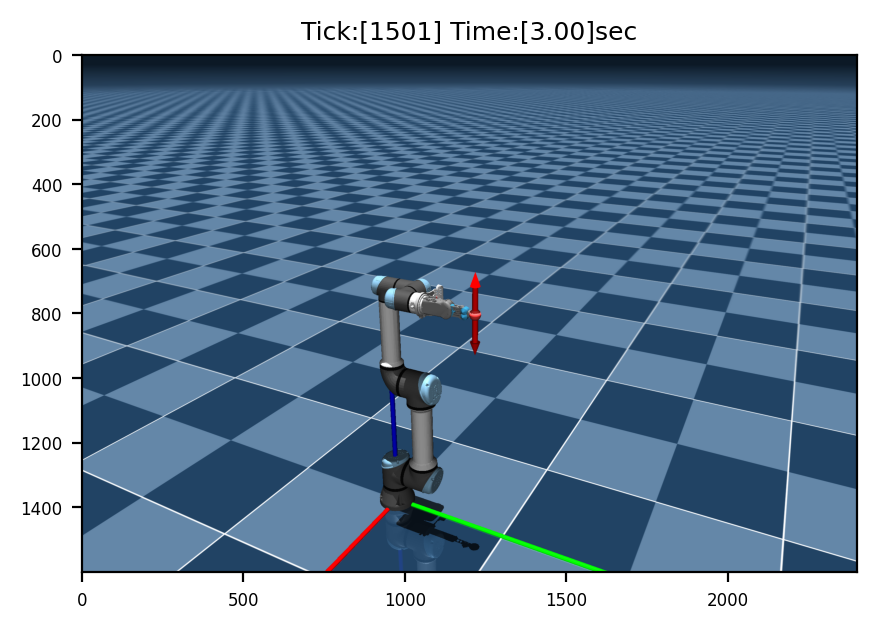

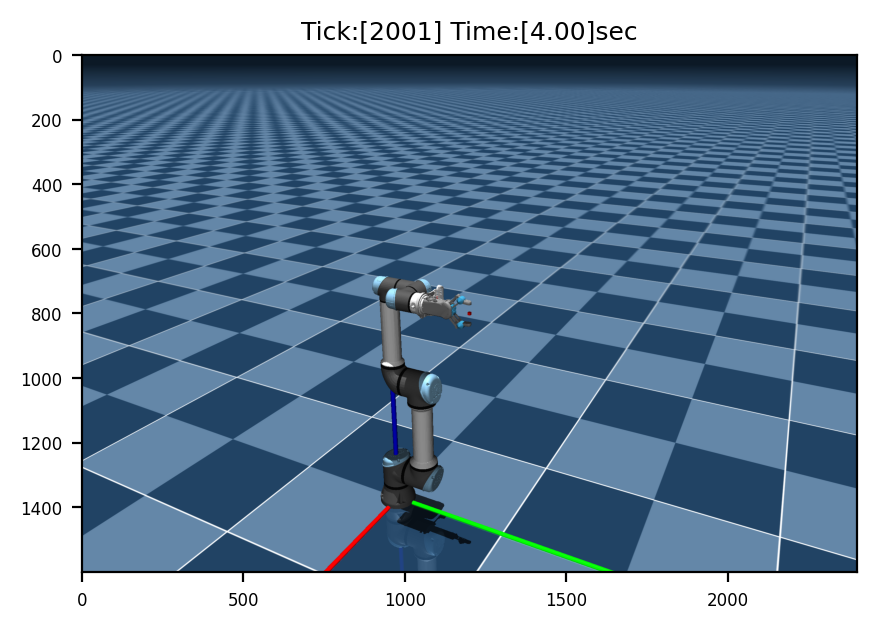

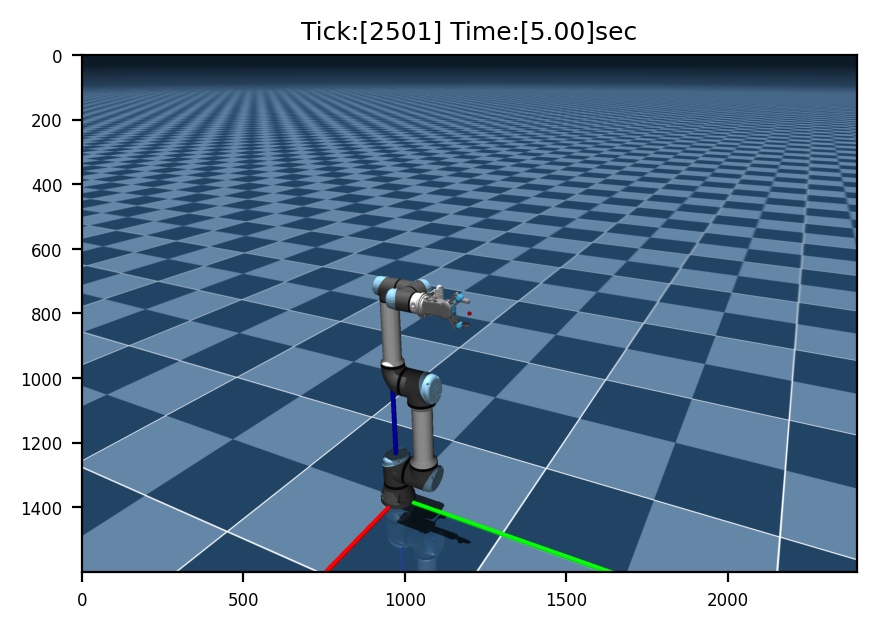

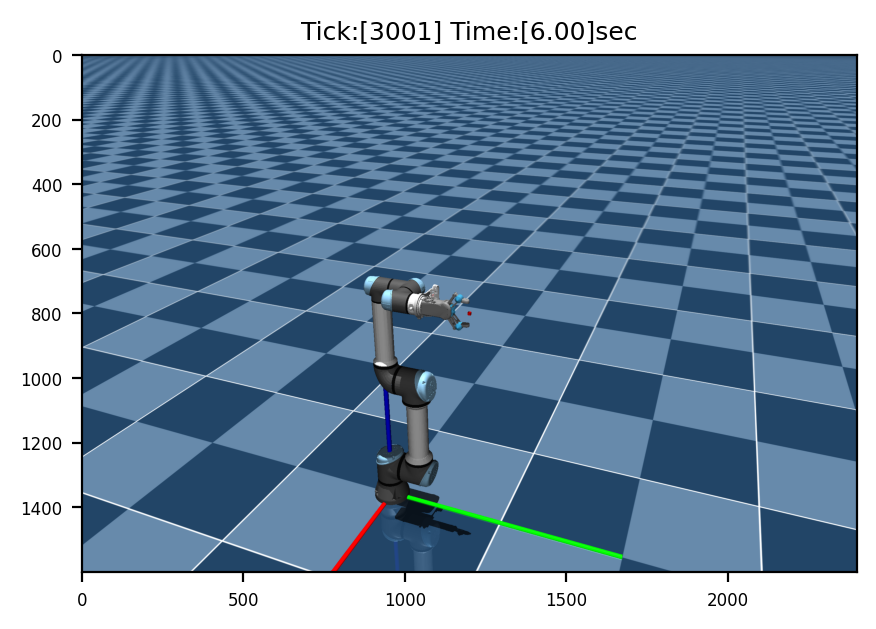

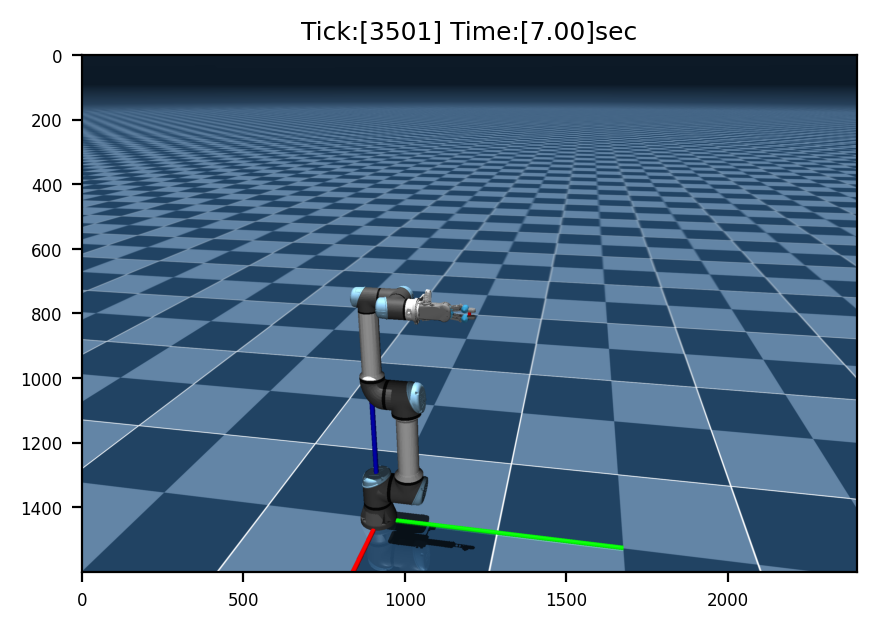

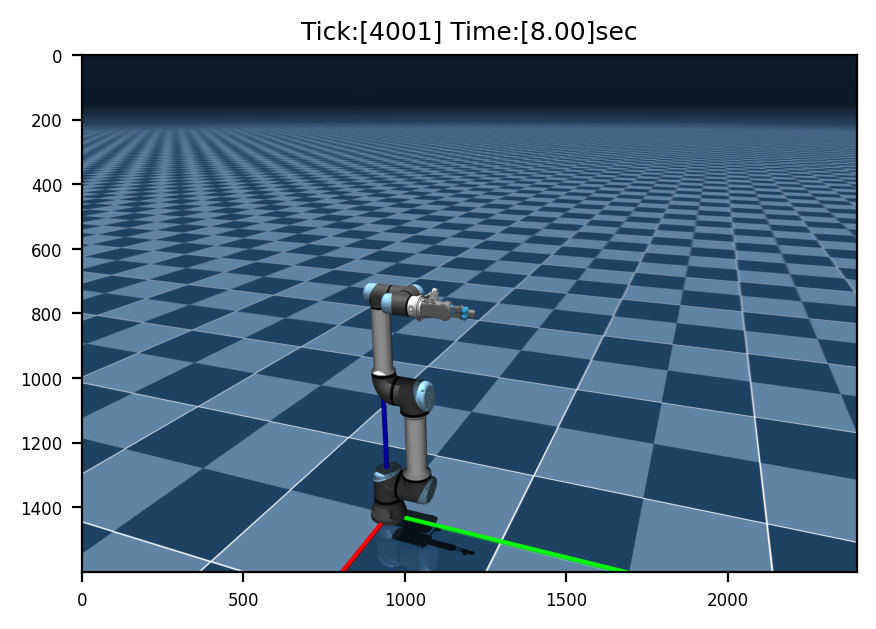

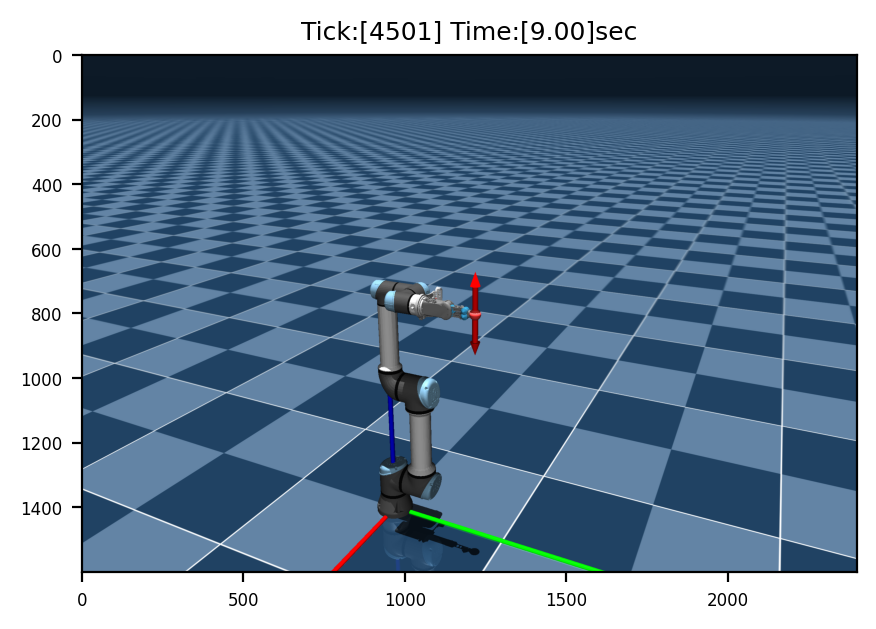

Pressed ESC
Quitting.
Done.


In [3]:
env.init_viewer(viewer_title='UR5e with RG2',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True)
env.update_viewer(azimuth=174.08,distance=1.0,elevation=-33,lookat=[0.1,0.05,0.16],
                  VIS_TRANSPARENT=False,VIS_CONTACTPOINT=True,
                  contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=True,jointlength=0.5,jointwidth=0.1,
                  jointrgba=[0.2,0.6,0.8,0.6])
env.reset()
ctrl_ur5 = np.radians([0,-90,0,0,0,0])
while (env.get_sim_time() < 100.0) and env.is_viewer_alive():
    if (int(env.get_sim_time()/3.0)%2)==0: ctrl_gripper = 0
    else: ctrl_gripper = 1
    env.step(ctrl=np.append(ctrl_ur5,ctrl_gripper))
    env.plot_T(p=np.zeros(3),R=np.eye(3,3),PLOT_AXIS=True,axis_len=1.0,axis_width=0.01)
    p_lookat = env.get_p_body(body_name='tcp_link')
    env.update_viewer(lookat=p_lookat,CALL_MUJOCO_FUNC=False) # CALL_MUJOCO_FUNC may slow down rendering
    env.plot_contact_info() # plot contanct information
    env.render(render_every=5)
    if env.loop_every(HZ=1) and (env.get_sim_time() < 10.0): 
        scene_img = env.grab_image()
        plt.figure(figsize=(5,4)); plt.imshow(scene_img)
        plt.title("Tick:[%d] Time:[%.2f]sec"%(env.tick,env.get_sim_time()),fontsize=9)
        plt.show()
env.close_viewer()
print ("Done.")